# Problem 4

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm, t, ttest_1samp, wilcoxon 

In [2]:
samples = np.random.standard_normal((10000, 100))

In [3]:
# Likelihood ratio test

means = np.mean(samples, axis=1)

boundary = norm.ppf(.95) / np.sqrt(100)

reject_ratio = np.sum(means > boundary)/10000

print(f"Likelihood ratio test rejected {reject_ratio} of times")

Likelihood ratio test rejected 0.0524 of times


In [4]:
# t-test (I can't for the life of me figure out what's wrong here)
result = ttest_1samp(samples, 0, axis=1)

tstat = result.statistic

boundary = t.ppf(.95, 99)

reject_ratio = np.sum(tstat>boundary)/10000
print(f"t test rejected {reject_ratio} of times")

t test rejected 0.0524 of times


In [5]:
# Wilcoxon signed rank test 
ws, ps = wilcoxon(samples, axis=1, alternative='greater')

reject_ratio = np.sum(ps<.05)/10000
print(f"wilcoxon test rejected {reject_ratio} of times")

wilcoxon test rejected 0.0544 of times


In [6]:
# Signed rank test
Ss = np.sum(samples>0, axis=1)

mean = 100 * .5 
std = np.sqrt(100 * .5 * .5)

zs = (Ss-mean)/std
reject_ratio = np.sum(zs > norm.ppf(.95))/10000

print(f"sign test rejected {reject_ratio} of times")

sign test rejected 0.047 of times


All tests have empirical significance of around .05

## Powers of tests

In [7]:
def get_lr_power(mean): 
    samples = np.random.standard_normal((10000, 100)) + mean 
    
    means = np.mean(samples, axis=1)

    boundary = norm.ppf(.95) / np.sqrt(100)

    reject_ratio = np.sum(means > boundary)/10000
    
    return reject_ratio

In [8]:
def get_t_power(mean): 
    samples = np.random.standard_normal((10000, 100)) + mean 

    result = ttest_1samp(samples, 0, axis=1)

    tstat = result.statistic

    boundary = t.ppf(.95, 99)

    reject_ratio = np.sum(tstat>boundary)/10000
    
    return reject_ratio 

In [9]:
def get_wilcoxon_power(mean): 
    samples = np.random.standard_normal((10000, 100)) + mean 

    ws, ps = wilcoxon(samples, axis=1, alternative='greater')

    reject_ratio = np.sum(ps<.05)/10000
    
    return reject_ratio

In [10]:
def get_sign_power(mean): 
    samples = np.random.standard_normal((10000, 100)) + mean 

    Ss = np.sum(samples>0, axis=1)

    mean = 100 * .5 
    std = np.sqrt(100 * .5 * .5)

    zs = (Ss-mean)/std
    reject_ratio = np.sum(zs > norm.ppf(.95))/10000
    
    return reject_ratio

## (B) The chart 

In [11]:
mus = [0.1, 0.2, 0.3, 0.4]
lr = [get_lr_power(mu) for mu in mus]
t = [get_t_power(mu) for mu in mus]
wilc = [get_wilcoxon_power(mu) for mu in mus]
sign = [get_sign_power(mu) for mu in mus]

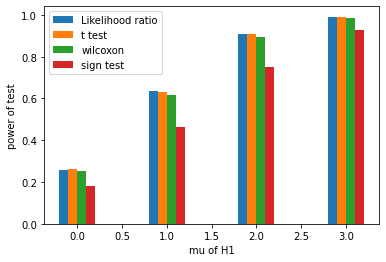

In [24]:
x_axis = np.arange(len(mus))

plt.bar(x_axis-.15, lr, .1, label="Likelihood ratio")
plt.bar(x_axis-.05, t, .1, label="t test")
plt.bar(x_axis+.05, wilc, .1, label="wilcoxon")
plt.bar(x_axis+.15, sign, .1, label="sign test")

plt.xlabel("mu of H1")
plt.ylabel("power of test")

plt.legend()
plt.show()

## (C)
The powers of the likelihood ratio test, t test, and wilcoxon test are close. The sign test has a much lower power than the other three. Your friend is wrong, since a test that makes greater distributional assumptions can have the advantage of being higher-powered. Our findings support Rice's conclusion. The signed rank test is almost as powerful as the t-test. 